In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
print("done step 1")

done step 1


# PD Data ONLY

In [2]:
os.chdir('/Volumes/JosephBSR/Ben_BSR_all')

/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
# PD_tap=pd.read_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/hab_output.csv')
# PD_tap = PD_tap.iloc[: , 1:]
PD_baseline=pd.read_csv('baseline_output.csv')
PD_baseline = PD_baseline.iloc[: , 1:]
PD_baseline = PD_baseline.drop(columns=["x","y"])
PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)
# print(PD_tap)
print(PD_baseline)

<ipython-input-3-3ae5d874cfcc>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)


         time_bin  worm     time     speed  angularspeed  pathlength   kink  \
0             4.0   166    3.959  0.187700        9.7000     0.02400  49.30   
1             4.0   242    3.715  0.214500       24.7500     0.06700  74.44   
2             4.0   243    3.803  0.303000       17.7500     0.06300  48.25   
3             4.0   370    3.785  0.227900       32.5600     0.05680  19.78   
4             4.0   462    3.863  0.237500        1.2000     0.04565  44.22   
...           ...   ...      ...       ...           ...         ...    ...   
1442153     420.0   102  419.500  0.017470        1.9620     3.87500  43.12   
1442154     420.0   105  419.500  0.014080        0.7153    17.27000  20.16   
1442155     420.0   106  419.500  0.007717        0.5615    28.58000  40.97   
1442156     420.0   107  419.500  0.030330        4.4920     4.98400  35.88   
1442157     420.0   108  419.500  0.022920        3.0080     7.01600  44.66   

           bias  curve  dir      crab  length  midl

In [4]:
PD_baseline_last100 = PD_baseline[((PD_baseline.time <= 420) & (PD_baseline.time >= 320))]
PD_baseline_last100 = PD_baseline_last100.reset_index()
print(PD_baseline_last100)

          index  time_bin  worm   time     speed  angularspeed  pathlength  \
0        208005     320.0   374  320.0  0.259800      137.0000      -0.034   
1        208536     321.0     9  320.5  0.238800        8.9450      41.840   
2        208537     321.0    11  320.5  0.246200       18.7300       3.623   
3        208538     321.0    12  320.5  0.270300       31.0000      11.030   
4        208539     321.0    14  320.5  0.250000       28.0500       8.390   
...         ...       ...   ...    ...       ...           ...         ...   
321157  1442153     420.0   102  419.5  0.017470        1.9620       3.875   
321158  1442154     420.0   105  419.5  0.014080        0.7153      17.270   
321159  1442155     420.0   106  419.5  0.007717        0.5615      28.580   
321160  1442156     420.0   107  419.5  0.030330        4.4920       4.984   
321161  1442157     420.0   108  419.5  0.022920        3.0080       7.016   

         kink    bias  curve       dir      crab  length  midli

In [5]:
tt = ttest_ind(PD_baseline_last100["bias"], PD_baseline_last100[PD_baseline_last100.Genotype == "N2"]["bias"], equal_var = False)
print(tt)

Ttest_indResult(statistic=-37.89446950769279, pvalue=0.0)


In [6]:
list = PD_baseline_last100["Genotype"].unique()
print(list)

['N2' 'R07G3.8(tm5683)' 'cat-2(e1112)' 'gba-2(tm4623)' 'gba-4(tm3314)'
 'hipr-1(ok1081)' 'igcm-2(ok1527)' 'lfe-2(tm14109)' 'rskd-1(tm4031)'
 'sac-2(ok2743)' 'set-2(ok1484)']


In [7]:
def TTest_New(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest_ind(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type],equal_var=False)[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [8]:
# # PD_baseline_instantspeed_T = pd.DataFrame(columns = ["Genotype", "Instantaneous Speed"])
# # PD_baseline_intspeed_T = pd.DataFrame(columns = ["Genotype", "Interval Speed"])

PD_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

# # PD_baseline_aspectratio_T = pd.DataFrame(columns = ["Genotype", "Aspect Ratio"])

# PD_baseline_speed_T = pd.DataFrame(columns = ["Genotype", "speed"])
# PD_baseline_angularspeed_T = pd.DataFrame(columns = ["Genotype", "angularspeed"])
# PD_baseline_bias_T = pd.DataFrame(columns = ["Genotype", "bias"])
# PD_baseline_kink_T =  pd.DataFrame(columns = ["Genotype", "kink"])
# PD_baseline_curve_T = pd.DataFrame(columns = ["Genotype", "curve"])
# PD_baseline_crab_T = pd.DataFrame(columns = ["Genotype", "crab"])

In [9]:
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Instantaneous Speed", PD_baseline_last100, PD_baseline_instantspeed_T)
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Interval Speed", PD_baseline_last100, PD_baseline_intspeed_T)

TTest_New(PD_baseline_last100["Genotype"].unique(), "length", PD_baseline_last100, PD_baseline_length_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "midline", PD_baseline_last100, PD_baseline_midline_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "width", PD_baseline_last100, PD_baseline_width_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "morphwidth", PD_baseline_last100, PD_baseline_morphwidth_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "area", PD_baseline_last100, PD_baseline_area_T)

# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Aspect Ratio", PD_baseline_last100, PD_baseline_aspectratio_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "speed", PD_baseline_last100, PD_baseline_speed_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "angularspeed", PD_baseline_last100, PD_baseline_angularspeed_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "bias", PD_baseline_last100, PD_baseline_bias_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "kink", PD_baseline_last100, PD_baseline_kink_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "curve", PD_baseline_last100, PD_baseline_curve_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "crab", PD_baseline_last100, PD_baseline_crab_T)

           Genotype      length
0                N2    0.000000
1   R07G3.8(tm5683)   16.483056
2      cat-2(e1112)  -56.269253
3     gba-2(tm4623)  -53.158078
4     gba-4(tm3314)  -21.875496
5    hipr-1(ok1081)  -90.858139
6    igcm-2(ok1527)  -74.607594
7    lfe-2(tm14109)   54.290409
8    rskd-1(tm4031) -135.587794
9     sac-2(ok2743)  -55.015440
10    set-2(ok1484) -146.529812
           Genotype     midline
0                N2    0.000000
1   R07G3.8(tm5683)  -19.011565
2      cat-2(e1112)  -42.054900
3     gba-2(tm4623)  -95.773314
4     gba-4(tm3314)  -75.423044
5    hipr-1(ok1081) -108.750670
6    igcm-2(ok1527)  -84.087971
7    lfe-2(tm14109)   62.974980
8    rskd-1(tm4031) -177.199850
9     sac-2(ok2743)  -39.036855
10    set-2(ok1484) -260.012825
           Genotype      width
0                N2   0.000000
1   R07G3.8(tm5683) -45.286536
2      cat-2(e1112)  40.429079
3     gba-2(tm4623) -37.197459
4     gba-4(tm3314) -75.318120
5    hipr-1(ok1081)   9.065174
6    igcm-2(ok1

In [10]:
print(PD_baseline_length_T.iloc[:,1])

0       0.000000
1      16.483056
2     -56.269253
3     -53.158078
4     -21.875496
5     -90.858139
6     -74.607594
7      54.290409
8    -135.587794
9     -55.015440
10   -146.529812
Name: length, dtype: float64


In [11]:
# # PD_baseline_Tstats = PD_baseline_instantspeed_T

PD_baseline_Tstats = PD_baseline_length_T
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_midline_T.iloc[:,1])
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_width_T.iloc[:,1])
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_morphwidth_T.iloc[:,1])
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_area_T.iloc[:,1])

# # PD_baseline_Tstats = PD_baseline_speed_T
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_intspeed_T.iloc[:,1])

# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_speed_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_angularspeed_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_bias_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_kink_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_curve_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_crab_T.iloc[:,1])

# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_width_T.iloc[:,1])
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_length_T.iloc[:,1])
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_area_T.iloc[:,1])
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_angularspeed_T.iloc[:,1])

print(PD_baseline_Tstats)

           Genotype      length     midline      width  morphwidth        area
0                N2    0.000000    0.000000   0.000000    0.000000    0.000000
1   R07G3.8(tm5683)   16.483056  -19.011565 -45.286536  -23.672209   -8.875923
2      cat-2(e1112)  -56.269253  -42.054900  40.429079   15.231186  -32.520982
3     gba-2(tm4623)  -53.158078  -95.773314 -37.197459  -91.309138 -161.265268
4     gba-4(tm3314)  -21.875496  -75.423044 -75.318120  -79.190786 -123.175722
5    hipr-1(ok1081)  -90.858139 -108.750670   9.065174  -24.302509 -109.904018
6    igcm-2(ok1527)  -74.607594  -84.087971  16.834926   14.071444  -62.311014
7    lfe-2(tm14109)   54.290409   62.974980   0.023915   18.130469   49.468157
8    rskd-1(tm4031) -135.587794 -177.199850 -38.244528  -52.170800 -153.794442
9     sac-2(ok2743)  -55.015440  -39.036855  30.651788   25.031645  -18.219690
10    set-2(ok1484) -146.529812 -260.012825 -98.528556 -139.962875 -253.170860


In [12]:
PD_baseline_Tstats = PD_baseline_Tstats.set_index("Genotype")
print(PD_baseline_Tstats)

                     length     midline      width  morphwidth        area
Genotype                                                                  
N2                 0.000000    0.000000   0.000000    0.000000    0.000000
R07G3.8(tm5683)   16.483056  -19.011565 -45.286536  -23.672209   -8.875923
cat-2(e1112)     -56.269253  -42.054900  40.429079   15.231186  -32.520982
gba-2(tm4623)    -53.158078  -95.773314 -37.197459  -91.309138 -161.265268
gba-4(tm3314)    -21.875496  -75.423044 -75.318120  -79.190786 -123.175722
hipr-1(ok1081)   -90.858139 -108.750670   9.065174  -24.302509 -109.904018
igcm-2(ok1527)   -74.607594  -84.087971  16.834926   14.071444  -62.311014
lfe-2(tm14109)    54.290409   62.974980   0.023915   18.130469   49.468157
rskd-1(tm4031)  -135.587794 -177.199850 -38.244528  -52.170800 -153.794442
sac-2(ok2743)    -55.015440  -39.036855  30.651788   25.031645  -18.219690
set-2(ok1484)   -146.529812 -260.012825 -98.528556 -139.962875 -253.170860


In [13]:
PD_baseline_Tstats_sort = PD_baseline_Tstats.sort_index()
print(PD_baseline_Tstats_sort)

                     length     midline      width  morphwidth        area
Genotype                                                                  
N2                 0.000000    0.000000   0.000000    0.000000    0.000000
R07G3.8(tm5683)   16.483056  -19.011565 -45.286536  -23.672209   -8.875923
cat-2(e1112)     -56.269253  -42.054900  40.429079   15.231186  -32.520982
gba-2(tm4623)    -53.158078  -95.773314 -37.197459  -91.309138 -161.265268
gba-4(tm3314)    -21.875496  -75.423044 -75.318120  -79.190786 -123.175722
hipr-1(ok1081)   -90.858139 -108.750670   9.065174  -24.302509 -109.904018
igcm-2(ok1527)   -74.607594  -84.087971  16.834926   14.071444  -62.311014
lfe-2(tm14109)    54.290409   62.974980   0.023915   18.130469   49.468157
rskd-1(tm4031)  -135.587794 -177.199850 -38.244528  -52.170800 -153.794442
sac-2(ok2743)    -55.015440  -39.036855  30.651788   25.031645  -18.219690
set-2(ok1484)   -146.529812 -260.012825 -98.528556 -139.962875 -253.170860


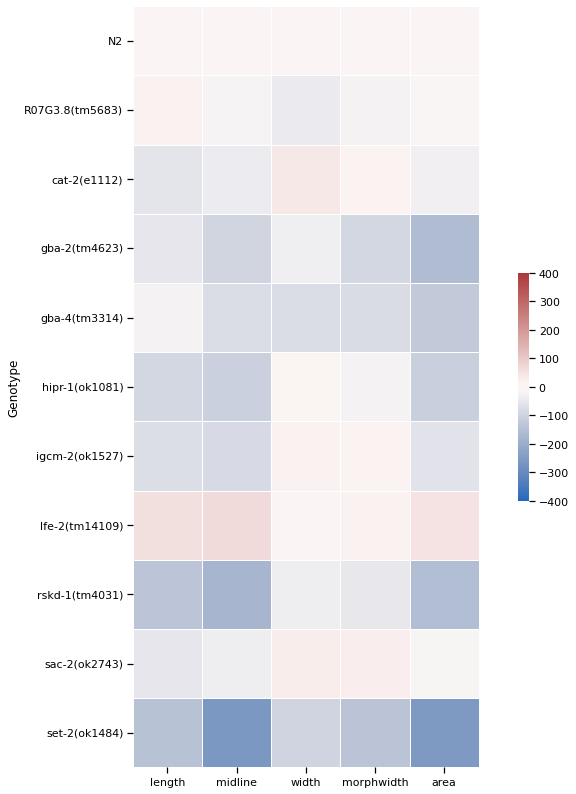

In [14]:
sns.set_context('notebook')
plt.figure(figsize = (14,14))
ax = sns.heatmap(data = PD_baseline_Tstats_sort, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 400,
                 vmin = -400, 
                 xticklabels = 1,
                 yticklabels = 1,
                 cbar_kws={"shrink": .3})
# plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=450)
plt.show()

# T stat analysis by gene

In [15]:
PD_gene_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_gene_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_gene_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_gene_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_gene_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

# # PD_baseline_aspectratio_T = pd.DataFrame(columns = ["Genotype", "Aspect Ratio"])

# PD_gene_baseline_speed_T = pd.DataFrame(columns = ["Genotype", "speed"])
# PD_gene_baseline_angularspeed_T = pd.DataFrame(columns = ["Genotype", "angularspeed"])
# PD_gene_baseline_bias_T = pd.DataFrame(columns = ["Genotype", "bias"])
# PD_gene_baseline_kink_T =  pd.DataFrame(columns = ["Genotype", "kink"])
# PD_gene_baseline_curve_T = pd.DataFrame(columns = ["Genotype", "curve"])
# PD_gene_baseline_crab_T = pd.DataFrame(columns = ["Genotype", "crab"])

In [16]:
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')
PD_baseline_last100 = PD_baseline_last100.dropna()
print(PD_baseline_last100)

          index  time_bin  worm   time     speed  angularspeed  pathlength  \
0        208005     320.0   374  320.0  0.259800      137.0000      -0.034   
1        208536     321.0     9  320.5  0.238800        8.9450      41.840   
2        208537     321.0    11  320.5  0.246200       18.7300       3.623   
3        208538     321.0    12  320.5  0.270300       31.0000      11.030   
4        208539     321.0    14  320.5  0.250000       28.0500       8.390   
...         ...       ...   ...    ...       ...           ...         ...   
321157  1442153     420.0   102  419.5  0.017470        1.9620       3.875   
321158  1442154     420.0   105  419.5  0.014080        0.7153      17.270   
321159  1442155     420.0   106  419.5  0.007717        0.5615      28.580   
321160  1442156     420.0   107  419.5  0.030330        4.4920       4.984   
321161  1442157     420.0   108  419.5  0.022920        3.0080       7.016   

         kink    bias  curve       dir      crab  length  midli

In [17]:
# print(PD_baseline_last100.Genotype.unique())
type(PD_baseline_last100.Genotype.unique()[1])

str

In [18]:
# ttest = ttest_ind(PD_baseline_last100[PD_baseline_last100.Gene=='F53B2.5']['Instantaneous Speed'],
#          PD_baseline_last100[PD_baseline_last100.Gene=='N2']['Instantaneous Speed'],
#          equal_var=False)
# ttest[0]

In [19]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest_ind(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type],equal_var=False)[0]
        row=[a, Tstat]
        output.loc[len(output)]=row
    print(output)

In [20]:
# TTest_Gene(PD_baseline_last100.Gene.unique(), 'Instantaneous Speed', PD_baseline_last100, PD_gene_baseline_instantspeed_T)

In [21]:
# PD_gene_baseline_instantspeed_T.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/baselineinstantspeedgene.csv')
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')

In [22]:
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Instantaneous Speed", PD_baseline_last100, PD_baseline_instantspeed_T)
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Interval Speed", PD_baseline_last100, PD_baseline_intspeed_T)

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "length", PD_baseline_last100, PD_gene_baseline_length_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "midline", PD_baseline_last100, PD_gene_baseline_midline_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "width", PD_baseline_last100, PD_gene_baseline_width_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "morphwidth", PD_baseline_last100, PD_gene_baseline_morphwidth_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "area", PD_baseline_last100, PD_gene_baseline_area_T)

# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Aspect Ratio", PD_baseline_last100, PD_baseline_aspectratio_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed", PD_baseline_last100, PD_gene_baseline_speed_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed", PD_baseline_last100, PD_gene_baseline_angularspeed_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias", PD_baseline_last100, PD_gene_baseline_bias_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink", PD_baseline_last100, PD_gene_baseline_kink_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve", PD_baseline_last100, PD_gene_baseline_curve_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab", PD_baseline_last100, PD_gene_baseline_crab_T)

           Genotype      length
0                N2    0.000000
1   R07G3.8(tm5683)   16.483056
2      cat-2(e1112)  -56.269253
3     gba-2(tm4623)  -53.158078
4     gba-4(tm3314)  -21.875496
5    hipr-1(ok1081)  -90.858139
6    igcm-2(ok1527)  -74.607594
7    lfe-2(tm14109)   54.290409
8    rskd-1(tm4031) -135.587794
9     sac-2(ok2743)  -55.015440
10    set-2(ok1484) -146.529812
           Genotype     midline
0                N2    0.000000
1   R07G3.8(tm5683)  -19.011565
2      cat-2(e1112)  -42.054900
3     gba-2(tm4623)  -95.773314
4     gba-4(tm3314)  -75.423044
5    hipr-1(ok1081) -108.750670
6    igcm-2(ok1527)  -84.087971
7    lfe-2(tm14109)   62.974980
8    rskd-1(tm4031) -177.199850
9     sac-2(ok2743)  -39.036855
10    set-2(ok1484) -260.012825
           Genotype      width
0                N2   0.000000
1   R07G3.8(tm5683) -45.286536
2      cat-2(e1112)  40.429079
3     gba-2(tm4623) -37.197459
4     gba-4(tm3314) -75.318120
5    hipr-1(ok1081)   9.065174
6    igcm-2(ok1

In [23]:
PD_gene_baseline_Tstats = PD_gene_baseline_length_T
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_midline_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_width_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_morphwidth_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_area_T.iloc[:,1])

# # PD_baseline_Tstats = PD_baseline_speed_T
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_intspeed_T.iloc[:,1])

# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.set_index("Genotype")
print(PD_gene_baseline_Tstats)

# # PD_gene_habituation_Tstats=PD_gene_recovery_dura
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_dura.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_dura.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_dura.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.set_index("dataset").dropna()                                        
# # print(PD_gene_habituation_Tstats)

                     length     midline      width  morphwidth        area
Genotype                                                                  
N2                 0.000000    0.000000   0.000000    0.000000    0.000000
R07G3.8(tm5683)   16.483056  -19.011565 -45.286536  -23.672209   -8.875923
cat-2(e1112)     -56.269253  -42.054900  40.429079   15.231186  -32.520982
gba-2(tm4623)    -53.158078  -95.773314 -37.197459  -91.309138 -161.265268
gba-4(tm3314)    -21.875496  -75.423044 -75.318120  -79.190786 -123.175722
hipr-1(ok1081)   -90.858139 -108.750670   9.065174  -24.302509 -109.904018
igcm-2(ok1527)   -74.607594  -84.087971  16.834926   14.071444  -62.311014
lfe-2(tm14109)    54.290409   62.974980   0.023915   18.130469   49.468157
rskd-1(tm4031)  -135.587794 -177.199850 -38.244528  -52.170800 -153.794442
sac-2(ok2743)    -55.015440  -39.036855  30.651788   25.031645  -18.219690
set-2(ok1484)   -146.529812 -260.012825 -98.528556 -139.962875 -253.170860


In [24]:
# PD_gene_baseline_Tstats_scaled = PD_gene_baseline_Tstats/40
# print(PD_gene_baseline_Tstats_scaled)

In [25]:
# # # FROM BEFORE
# # PD_gene_baseline_Tstats_scaled_sort = PD_gene_baseline_Tstats_scaled.sort_index()
# # print(PD_gene_baseline_Tstats_scaled_sort)

In [26]:
# PD_gene_Tstats_combined = pd.merge(PD_gene_baseline_Tstats, PD_gene_habituation_Tstats, on =['dataset'], how ='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index().drop(index="N2")
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index()
PD_gene_baseline_Tstats_normalize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.set_index("dataset")
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.sort_index()
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.drop(index="N2")

print(PD_gene_baseline_Tstats_normalize)

                   length   midline     width  morphwidth      area
Genotype                                                           
R07G3.8(tm5683)  1.172677  0.734547 -0.551095    0.181761  0.874899
cat-2(e1112)     0.000702  0.473442  1.299213    0.878963  0.611373
gba-2(tm4623)    0.050820 -0.135244 -0.376479   -1.030384 -0.823489
gba-4(tm3314)    0.554755  0.095346 -1.199375   -0.813207 -0.398979
hipr-1(ok1081)  -0.556495 -0.282291  0.622173    0.170465 -0.251065
igcm-2(ok1527)  -0.294713 -0.002837  0.789896    0.858178  0.279362
lfe-2(tm14109)   1.781720  1.663541  0.427003    0.930922  1.525147
rskd-1(tm4031)  -1.277050 -1.057892 -0.399082   -0.328972 -0.740226
sac-2(ok2743)    0.020900  0.507639  1.088155    1.054600  0.770762
set-2(ok1484)   -1.453316 -1.996250 -1.700409   -1.902325 -1.847782


In [27]:
# Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Gene_Orthology.csv')
# Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"dataset"})
# print(Gene_Orthology)

In [28]:
# PD_gene_Tstats_combined_normalize_joined=pd.merge(PD_gene_Tstats_combined_normalize,
#                                                  Gene_Orthology,
#                                                  on='dataset',
#                                                  how='inner')

# print(PD_gene_Tstats_combined_normalize_joined)

In [29]:
# # PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_joined.set_index("Orthology").sort_index()
# # PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_heatmap.drop(columns=['dataset','Unnamed: 0','Human Gene'])
# # print(PD_gene_Tstats_combined_normalize_heatmap)

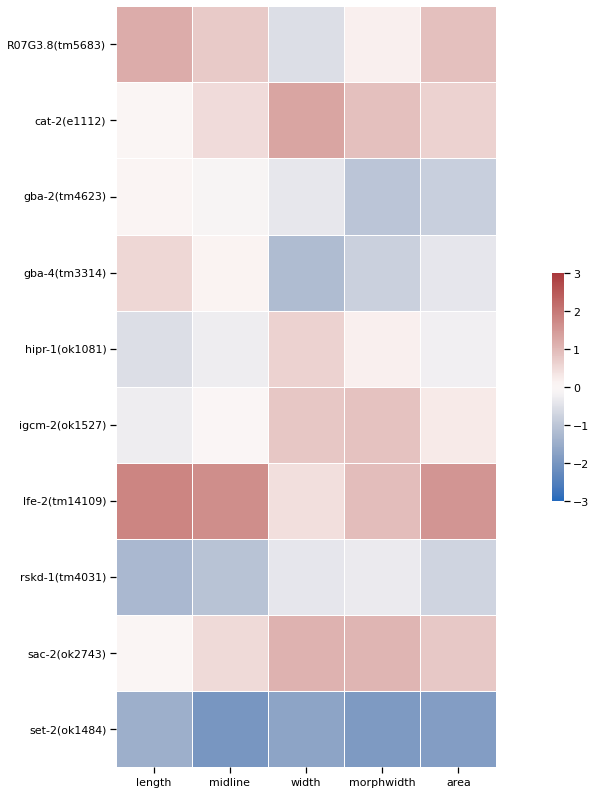

In [38]:
sns.set_context('notebook')
plt.figure(figsize=(20,14))
ax = sns.heatmap(data = PD_gene_baseline_Tstats_normalize, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
                 vmax=3,
                 vmin=-3, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
ax.set_ylabel('')    
plt.savefig('Tstat_GENE_normalized_square.png', format='png', dpi=450, bbox_inches = "tight")
plt.show()

In [31]:
# PD_gene_Tstats_melted=PD_gene_Tstats_combined_normalize.reset_index()
# print(PD_gene_Tstats_melted)
# PD_gene_Tstats_melted_gene=pd.melt(PD_gene_Tstats_melted, id_vars=['dataset'],
#                                    var_name='Metric',
#                                    value_name='Normalized T_score')
# PD_gene_Tstats_melted_gene_sorted=PD_gene_Tstats_melted_gene.sort_values(by=['Normalized T_score'])
# print(PD_gene_Tstats_melted_gene)
# print(PD_gene_Tstats_melted_gene_sorted)
# # PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
# #                              value_name='metric')


In [32]:
# metric_palette=["k","k","k","k","k","k","k","k","k","k",
#                 "darkgray","darkgray","darkgray","darkgray",
#                 "darkgray","darkgray","darkgray","darkgray",
#                 "darkgray","darkgray","darkgray","darkgray"]

In [33]:
# PD_gene_Tstats_combined_normalize_orthology_melted=PD_gene_Tstats_combined_normalize_heatmap.reset_index()
# PD_gene_Tstats_combined_normalize_orthology_melted=pd.melt(PD_gene_Tstats_combined_normalize_orthology_melted, id_vars=['Orthology'],
#                                    var_name='Metric',
#                                    value_name='Normalized T_score')
# PD_gene_Tstats_orthology_melted_gene_sorted=PD_gene_Tstats_combined_normalize_orthology_melted.sort_values(by=['Normalized T_score'])
# # print(PD_gene_Tstats_melted_gene)
# print(PD_gene_Tstats_orthology_melted_gene_sorted)
# # PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
# #                              value_name='metric')



In [34]:
# print(PD_gene_Tstats_melted_gene.dataset.unique())
# PD_gene_Tstats_combined_normalize_orthology=PD_gene_Tstats_combined_normalize_heatmap.reset_index()
# print(PD_gene_Tstats_combined_normalize_orthology.Orthology.unique())

In [35]:
# # sns.barplot(data=PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], x="Metric", y="T_score")
# # plt.xticks(rotation=90)

# sns.set_context('notebook')
# # # plt.figure(figsize=(14,14))
# # ax = sns.barplot(data = PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], 
# #                 x="Metric",
# #                 y="T_score",
# #                 palette=metric_palette)
# # plt.xticks(rotation=90)
# # # plt.savefig('/Users/Joseph/Desktop/PD_Screen_TapHab/Tstat_GENE.png', format='png', dpi=450, bbox_inches = "tight")
# # # '/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv'
# # plt.show()

# for x in PD_gene_Tstats_combined_normalize_orthology_melted.Orthology.unique():
#     plt.figure()
#     ax = sns.barplot(data = PD_gene_Tstats_combined_normalize_orthology_melted[PD_gene_Tstats_combined_normalize_orthology_melted.Orthology==f"{x}"], 
#                 x="Metric",
#                 y="Normalized T_score",
#                 palette=metric_palette).set_title(f"{x}")
#     plt.ylim(-3,3)
#     plt.xticks(rotation=90)
#     plt.savefig(f'/Users/Joseph/Desktop/PD_Screen_TapHab/Gene_Metrics/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
#     plt.show()
# print("done")

In [36]:
# # sns.barplot(data=PD_gene_Tstats_melted_gene_sorted[PD_gene_Tstats_melted_gene_sorted.Metric=="Instantaneous Speed"],
# #             x="dataset", y="T_score")
# # plt.xticks(rotation=90)

# for x in PD_gene_Tstats_melted_gene_sorted.Metric.unique():
#     plt.figure()
#     ax = sns.barplot(data = PD_gene_Tstats_melted_gene_sorted[PD_gene_Tstats_melted_gene_sorted.Metric==f"{x}"], 
#                 x="dataset",
#                 y="Normalized T_score",
#                 palette=["dimgray"]).set_title(f"{x}")
#     plt.xticks(rotation=90)
#     plt.ylim(-3,3)
#     plt.savefig(f'/Users/Joseph/Desktop/PD_Screen_TapHab/Metric_Scores/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
#     plt.show()
# print("done")

In [37]:
# # print(PD_recov_taps)
# # print(PD_habit_levels)
# # print(PD_baseline_last100)